In [1]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hca
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster
from pylab import *



In [3]:
data = pd.read_csv("data/results/meteorites_unweighted.csv", index_col=0)
data = data.drop(columns=["id","recclass", "weights","lvl3","lvl4"])
data.head()

,mass,fell_found,year,latitude,longitude,group,chondrite,type,lc_sample
1,21.0,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,11
2,720.0,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,1
3,331.0,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,2
4,21100.0,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,13
5,107000.0,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,1


In [4]:
data_NaN = data[data.isna().any(axis=1)]
data_NaN

,mass,fell_found,year,latitude,longitude,group,chondrite,type,lc_sample
415,367.0,Fell,1769,50.66667,2.33333,Unknown,NaN,NaN,1
479,2700.0,Fell,1880,26.58333,85.56667,Stony,NaN,Stony,1
539,367.0,Found,1954,22.75000,51.16667,Stony,NaN,Stony,14
819,2400.0,Fell,1916,11.75000,122.33333,Stony,NaN,Stony,1
902,367.0,Fell,1791,43.35000,11.50000,Stony,NaN,Stony,11
905,15000.0,Fell,1583,39.80000,16.20000,Stony,NaN,Stony,15
948,72.0,Fell,1880,14.50000,76.50000,Stony,NaN,Stony,1
3209,642.0,Fell,1976,-13.66667,33.91667,Stony,NaN,Stony,1
3231,367.0,Fell,1976,43.33333,128.25000,Stony,NaN,Stony,2
3442,367.0,Fell,1944,28.25000,7.00000,Stony,NaN,Stony,14


In [5]:
# I'm willing to drop 50 samples from my dataset.  The NaN on Chondrite/Achondrite 
# are a majority of them, and those are due to the classification system not being precise.

data = data.dropna()

len(data)

9847

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 50503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration:

Starting iterations...
Run 2, iteration: 1/100, moves: 216, cost: 46019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3775, cost: 45456.0
Run 3, iteration: 2/100, moves: 24, cost: 45435.0
Run 3, iteration: 3/100, moves: 1, cost: 45435.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2954, cost: 43895.0
Run 4, iteration: 2/100, moves: 76, cost: 43895.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 474, cost: 43772.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 3062, cost: 43836.0
Run 6, iteration: 2/100, moves: 35, cost: 43836.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 740, cost: 44254.0
Run 7, iteration: 2/100, moves: 17, cost: 44254.0
Init: initializing 

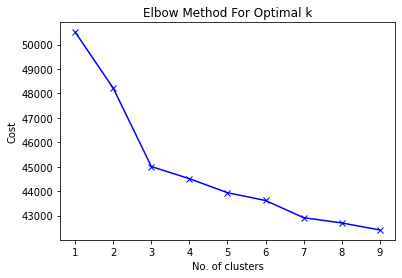

In [6]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 10, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
# Building the model with 7 clusters
kmode = KModes(n_clusters=7, init = "random", n_init = 10, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 318, cost: 44214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 526, cost: 43325.0
Run 2, iteration: 2/100, moves: 41, cost: 43325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1009, cost: 43399.0
Run 3, iteration: 2/100, moves: 1494, cost: 43166.0
Run 3, iteration: 3/100, moves: 71, cost: 43166.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 436, cost: 43500.0
Run 4, iteration: 2/100, moves: 4, cost: 43500.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3025, cost: 45001.0
Run 5, iteration: 2/100, moves: 1, cost: 45001.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iterat

array([3, 3, 0, ..., 0, 5, 0], dtype=uint16)

In [8]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,mass,fell_found,year,latitude,longitude,group,chondrite,type,lc_sample
1,3,21.0,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,11
2,3,720.0,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,1
3,0,331.0,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,2
4,0,21100.0,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,13
5,3,107000.0,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,1
...,...,...,...,...,...,...,...,...,...,...
9893,5,7700.0,Found,2011,19.15823,54.88668,L,Chondrite,Stony,11
9894,0,11.1,Found,2012,34.82793,-118.14640,LL,Chondrite,Stony,11
9895,0,254.0,Found,2011,40.95465,-118.49693,H,Chondrite,Stony,11
9896,5,2854.0,Found,2012,40.89201,-118.55319,L,Chondrite,Stony,11


In [9]:
data.describe()

,Cluster,mass,year,latitude,longitude,lc_sample
count,9847.000000,9.847000e+03,9847.000000,9847.000000,9847.000000,9847.000000
mean,1.778410,5.438344e+04,1979.105921,20.483057,12.194281,9.510917
std,2.152062,1.088070e+06,44.799477,21.069679,69.720014,3.927985
min,0.000000,1.000000e-01,860.000000,-57.786670,-163.166670,0.000000
25%,0.000000,9.500000e+01,1975.000000,19.045300,-9.500000,11.000000
50%,0.000000,3.700000e+02,1998.000000,25.526110,16.388330,11.000000
75%,4.000000,2.157130e+03,2002.000000,31.833330,55.646325,11.000000
max,6.000000,6.000000e+07,2013.000000,66.400000,178.083330,18.000000


In [25]:
data




,Cluster,mass,fell_found,year,latitude,longitude,group,chondrite,type,lc_sample
1,3,21.0,Fell,1880,50.77500,6.08333,L,Chondrite,Stony,11
2,3,720.0,Fell,1951,56.18333,10.23333,H,Chondrite,Stony,1
3,0,331.0,Found,1982,26.80000,-105.41667,H,Chondrite,Stony,2
4,0,21100.0,Found,1951,36.30000,-104.28333,H,Chondrite,Stony,13
5,3,107000.0,Fell,1952,54.21667,-113.00000,EH,Chondrite,Stony,1
...,...,...,...,...,...,...,...,...,...,...
9893,5,7700.0,Found,2011,19.15823,54.88668,L,Chondrite,Stony,11
9894,0,11.1,Found,2012,34.82793,-118.14640,LL,Chondrite,Stony,11
9895,0,254.0,Found,2011,40.95465,-118.49693,H,Chondrite,Stony,11
9896,5,2854.0,Found,2012,40.89201,-118.55319,L,Chondrite,Stony,11


In [26]:
data.to_csv('data/results/meteorites_clustered.csv')



In [27]:
cluster0 = data[data.Cluster == 0]
cluster1 = data[data.Cluster == 1]
cluster2 = data[data.Cluster == 2]
cluster3 = data[data.Cluster == 3]
cluster4 = data[data.Cluster == 4]
cluster5 = data[data.Cluster == 5]
cluster6 = data[data.Cluster == 6]




In [28]:
len(cluster0)

5015

In [29]:
len(cluster1)


1023

In [30]:
len(cluster2)


238

In [31]:
len(cluster3)

784

In [32]:
len(cluster4)

526

In [33]:
len(cluster5)

2009

In [34]:
len(cluster6)

252

In [35]:
clt = [cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6]

chart = data.groupby(['Cluster']).mean()
chart['Dimensions'] = [size(cluster0), size(cluster1),size(cluster2),size(cluster3),size(cluster4),size(cluster5),size(cluster6)]
chart


,mass,year,latitude,longitude,lc_sample,Dimensions
Cluster,,,,,,
0,5561.604466,1991.891326,19.668440,14.202153,10.147358,50150
1,466690.650371,1924.369501,21.151690,-18.259852,7.173021,10230
2,1484.680252,2005.000000,20.459072,44.444696,11.000000,2380
3,17516.717347,1916.974490,30.589313,6.160411,4.635204,7840
4,18230.730532,1961.140684,18.357466,-18.202045,6.859316,5260
5,2850.082758,2000.774017,19.713184,25.881971,11.000000,20090
6,3159.131627,1980.468254,13.135574,38.503635,13.761905,2520
